<a id='top'></a>

# CSCI3022 S21
# Homework 7: Regression Practice
***

**Name**: yixiao lei

***

This assignment is due on Canvas by **MIDNIGHT on Friday, April 22**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Data Set 1](#p1) | [Data Set 2](#p2) | [Data Set 3](#p3) |  [Data Set 4](#p4) |
---

In [1]:
#old salwarts
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats
%matplotlib inline

#new friends
import seaborn as sns
import statsmodels.api as sm #this line is now always in our opener
from statsmodels.stats.outliers_influence import summary_table
from patsy import dmatrices # for making design matrices out of categorical features #instead of sm.add_constant


## [All problems: 11 points/ea]
**Shortcuts:**  [1](#p1) | [2](#p2) | [3](#p3) | [4](#p4) |


Run the cell below to load in the data set known as "Anscombe's Quartet."  It contains 4 data sets, each with its own set of $x$ and $y$ values.


Each data set has exactly 11 observations.  For each data set, you will perform the same steps of visualizing and fitting a linear model.

In [2]:
df = sns.load_dataset("anscombe")

print(df.head())
df['dataset'].unique()

  dataset     x     y
0       I  10.0  8.04
1       I   8.0  6.95
2       I  13.0  7.58
3       I   9.0  8.81
4       I  11.0  8.33


array(['I', 'II', 'III', 'IV'], dtype=object)

<br>

---
<a/ id='p1'></a>
[Back to top](#top)
## [25 points] Data Set 1

For the data set marked with "I" in the given data frame,  perform a regression analysis.  Use markdown to clearly mark each step.


#### Part A: Make a scatter plot of the data set and overlay the line of best least-squares fit.  Print the summary table, and write the final model in a markdown cell.

In [3]:
def regression(x,y):
    xbar = x.mean()
    ybar = y.mean()
    numerator = np.array((x-xbar)*(y-ybar)).sum()
    denominator = np.array((x-xbar)*(x-xbar)).sum()
    beta = numerator/denominator
    alpha = ybar - beta*xbar
    yhat = alpha + beta*x
    return alpha,beta,yhat

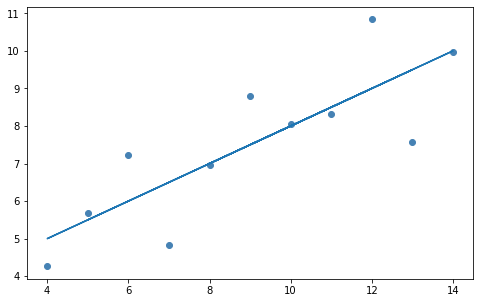

In [4]:
type1=df.loc[df['dataset']=='I']
#fc=(df['dataset']=='I')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
ax.scatter(type1["x"], type1["y"], color="steelblue")
alpha,beta,yhat = regression(type1["x"],type1["y"])
line = ax.plot(type1["x"],yhat,label="LS fit")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Sun, 25 Apr 2021   Prob (F-statistic):            0.00217
Time:                        20:48:48   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0001      1.125      2.667      0.0

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


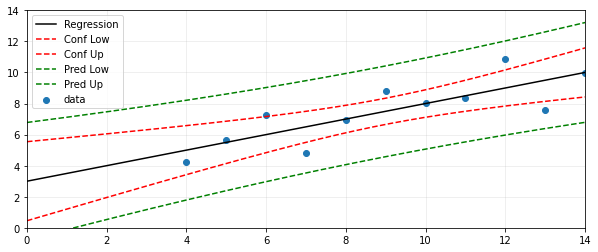

In [5]:

lm1=sm.OLS(type1["y"],sm.add_constant(type1["x"])).fit()
print(lm1.summary())
xgrd=np.linspace(0,20,1000) 
predictions = lm1.get_prediction(sm.add_constant(xgrd))

predmat=predictions.summary_frame(0.05)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
ax.set_axisbelow(True)
ax.set_xlim([0,14])
ax.set_ylim([0,14])
plt.scatter(type1["x"],type1["y"], label='data')
ax.grid(alpha=0.25)
plt.plot(xgrd,(predmat.mean_ci_lower+predmat.mean_ci_upper)/2, color='black', label='Regression')
plt.plot(xgrd,predmat.mean_ci_lower, 'r--', label='Conf Low')
plt.plot(xgrd,predmat.mean_ci_upper, 'r--', label='Conf Up')
plt.plot(xgrd,predmat.obs_ci_lower, 'g--', label='Pred Low')
plt.plot(xgrd,predmat.obs_ci_upper, 'g--', label='Pred Up')
plt.legend()


#### Part B: Make a scatter plot where the original x-values are the x-axis and the residuals of the line of best least-squares fit are the y-axis.

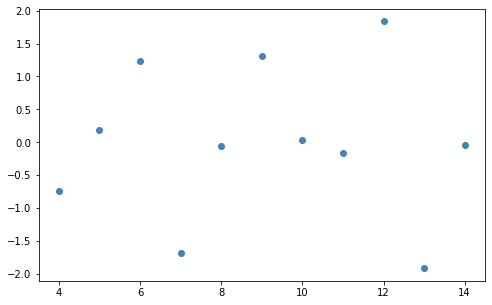

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
ax.scatter(type1["x"], type1["y"]-yhat, color="steelblue")
    


#### Part C: For each of the 4 major assumptions of the simple linear regression model, use your plots in parts A and B to decide whether or not the data set meets those assumptions.

it doesn't violate the four assumption.



#### Part D: If the data set violated any assumptions in part C, adjust the model accordingly if possible.  Consider removing outliers, adding higher order polynomial terms, etc.  If you adjust the model, make another set of plots as in parts A and B of the new fit and the new residuals.


#### Part E: Write a sentence or two describing your thought process above.  If you did not adjust a model, why not?  If you did, what are the effects?

I didn't fix adjust the model, because the residuals is independent, homoscedasticity, and normallized.

<br>

---
<a/ id='p2'></a>
[Back to top](#top)
## [25 points] Data Set 2

For the data set marked with "II" in the given data frame,  perform a regression analysis.  Use markdown to clearly mark each step.


#### Part A: Make a scatter plot of the data set and overlay the line of best least-squares fit.  Print the summary table, and write the final model in a markdown cell.

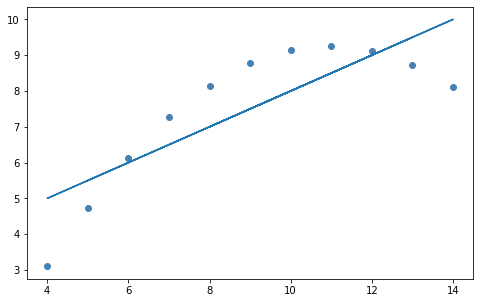

In [7]:
type2=df.loc[df['dataset']=='II']
#fc=(df['dataset']=='I')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
ax.scatter(type2["x"], type2["y"], color="steelblue")
alpha,beta,yhat = regression(type2["x"],type2["y"])
line = ax.plot(type2["x"],yhat,label="LS fit")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Sun, 25 Apr 2021   Prob (F-statistic):            0.00218
Time:                        20:48:48   Log-Likelihood:                -16.846
No. Observations:                  11   AIC:                             37.69
Df Residuals:                       9   BIC:                             38.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0009      1.125      2.667      0.0

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


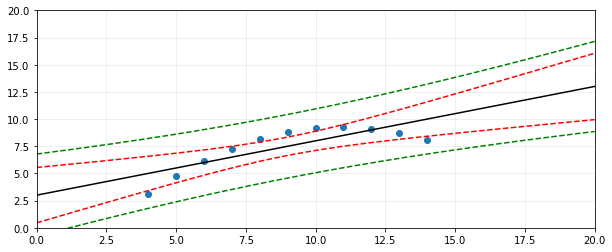

In [8]:


lm1=sm.OLS(type2["y"],sm.add_constant(type2["x"])).fit()
print(lm1.summary())
xgrd=np.linspace(0,20,1000) 
predictions = lm1.get_prediction(sm.add_constant(xgrd))

predmat=predictions.summary_frame(0.05)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
ax.set_axisbelow(True)
ax.set_xlim([0,20])
ax.set_ylim([0,20])
plt.scatter(type2["x"],type2["y"], label='data')
ax.grid(alpha=0.25)
plt.plot(xgrd,(predmat.mean_ci_lower+predmat.mean_ci_upper)/2, color='black', label='Regression')
plt.plot(xgrd,predmat.mean_ci_lower, 'r--', label='Conf Low')
plt.plot(xgrd,predmat.mean_ci_upper, 'r--', label='Conf Up')
plt.plot(xgrd,predmat.obs_ci_lower, 'g--', label='Pred Low')
plt.plot(xgrd,predmat.obs_ci_upper, 'g--', label='Pred Up')


#### Part B: Make a scatter plot where the original x-values are the x-axis and the residuals of the line of best least-squares fit are the y-axis.

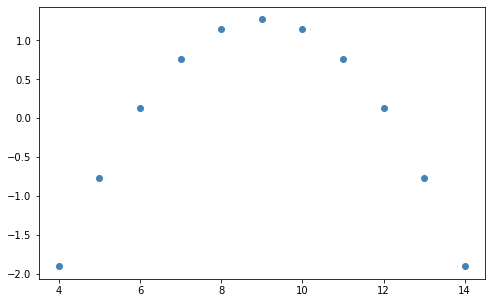

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
ax.scatter(type2["x"], type2["y"]-yhat, color="steelblue")
    


#### Part C: For each of the 4 major assumptions of the simple linear regression model, use your plots in parts A and B to decide whether or not the data set meets those assumptions.

it violate the independent of error, because the residuals has a relationship with x value.


#### Part D: If the data set violated any assumptions in part C, adjust the model accordingly if possible.  Consider removing outliers, adding higher order polynomial terms, etc.  If you adjust the model, make another set of plots as in parts A and B of the new fit and the new residuals.

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              549.4
Date:                Sun, 25 Apr 2021   Prob (F-statistic):                    3.93e-10
Time:                        20:48:49   Log-Likelihood:                         -11.658
No. Observations:                  11   AIC:                                      27.32
Df Residuals:                       9   BIC:                                      28.11
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
<ipython-input-10-7896f04949f6>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  type2["x"], y_pred = zip(*sorted_zip)


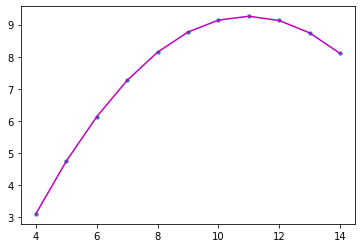

In [10]:
import operator
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
x = np.array(type2["x"]).reshape((-1, 1))
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)
lm4=sm.OLS(type2["y"], x_).fit()
print(lm4.summary())
model = LinearRegression().fit(x_, type2["y"])
y_pred = model.predict(x_)
rmse = np.sqrt(mean_squared_error(type2["y"],y_pred))
r2 = r2_score(type2["y"],y_pred)
plt.scatter(type2["x"], type2["y"], s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(type2["x"],y_pred), key=sort_axis)
type2["x"], y_pred = zip(*sorted_zip)
plt.plot(type2["x"], y_pred, color='m')
plt.show()


#### Part E: Write a sentence or two describing your thought process above.  If you did not adjust a model, why not?  If you did, what are the effects?

This is an example of under-fitting. we adjust by adding higher order polynomial terms.

<br>

---
<a/ id='p3'></a>
[Back to top](#top)
## [25 points] Data Set 3

For the data set marked with "III" in the given data frame,  perform a regression analysis.  Use markdown to clearly mark each step.


#### Part A: Make a scatter plot of the data set and overlay the line of best least-squares fit.  Print the summary table, and write the final model in a markdown cell.

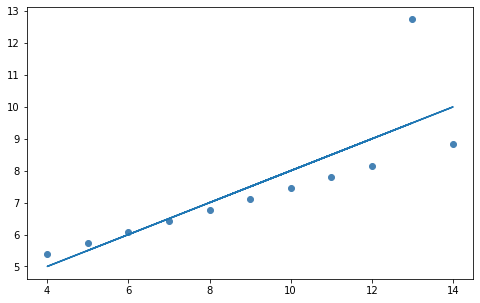

In [11]:
type3=df.loc[df['dataset']=='III']
#fc=(df['dataset']=='I')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
ax.scatter(type3["x"], type3["y"], color="steelblue")
alpha,beta,yhat = regression(type3["x"],type3["y"])
line = ax.plot(type3["x"],yhat,label="LS fit")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.97
Date:                Sun, 25 Apr 2021   Prob (F-statistic):            0.00218
Time:                        20:48:49   Log-Likelihood:                -16.838
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0025      1.124      2.670      0.0

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


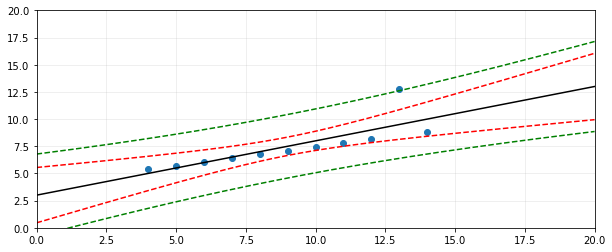

In [12]:

lm1=sm.OLS(type3["y"],sm.add_constant(type3["x"])).fit()
print(lm1.summary())
xgrd=np.linspace(0,20,1000) 
predictions = lm1.get_prediction(sm.add_constant(xgrd))

predmat=predictions.summary_frame(0.05)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
ax.set_axisbelow(True)
ax.set_xlim([0,20])
ax.set_ylim([0,20])
plt.scatter(type3["x"],type3["y"], label='data')
ax.grid(alpha=0.25)
plt.plot(xgrd,(predmat.mean_ci_lower+predmat.mean_ci_upper)/2, color='black', label='Regression')
plt.plot(xgrd,predmat.mean_ci_lower, 'r--', label='Conf Low')
plt.plot(xgrd,predmat.mean_ci_upper, 'r--', label='Conf Up')
plt.plot(xgrd,predmat.obs_ci_lower, 'g--', label='Pred Low')
plt.plot(xgrd,predmat.obs_ci_upper, 'g--', label='Pred Up')


#### Part B: Make a scatter plot where the original x-values are the x-axis and the residuals of the line of best least-squares fit are the y-axis.

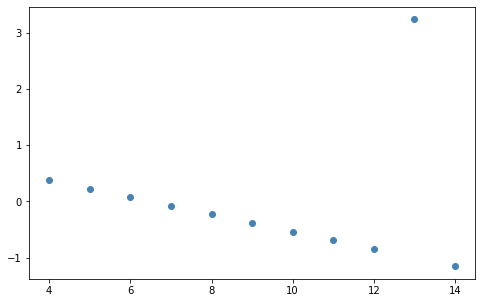

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
ax.scatter(type3["x"], type3["y"]-yhat, color="steelblue")


#### Part C: For each of the 4 major assumptions of the simple linear regression model, use your plots in parts A and B to decide whether or not the data set meets those assumptions.

In [14]:
new=type3.loc[df['y']<11]
print(new)


   dataset     x     y
22     III  10.0  7.46
23     III   8.0  6.77
25     III   9.0  7.11
26     III  11.0  7.81
27     III  14.0  8.84
28     III   6.0  6.08
29     III   4.0  5.39
30     III  12.0  8.15
31     III   7.0  6.42
32     III   5.0  5.73



#### Part D: If the data set violated any assumptions in part C, adjust the model accordingly if possible.  Consider removing outliers, adding higher order polynomial terms, etc.  If you adjust the model, make another set of plots as in parts A and B of the new fit and the new residuals.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.161e+06
Date:                Sun, 25 Apr 2021   Prob (F-statistic):           6.17e-22
Time:                        20:48:49   Log-Likelihood:                 44.749
No. Observations:                  10   AIC:                            -85.50
Df Residuals:                       8   BIC:                            -84.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0056      0.003   1369.808      0.0

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


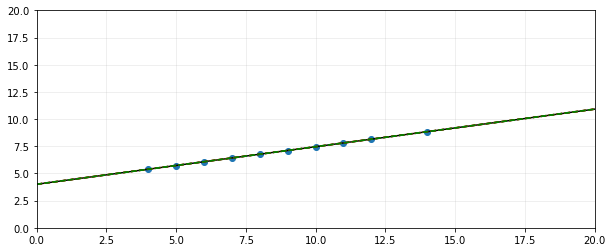

In [15]:

lm1=sm.OLS(new["y"],sm.add_constant(new["x"])).fit()
print(lm1.summary())
xgrd=np.linspace(0,20,1000) 
predictions = lm1.get_prediction(sm.add_constant(xgrd))

predmat=predictions.summary_frame(0.05)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
ax.set_axisbelow(True)
ax.set_xlim([0,20])
ax.set_ylim([0,20])
plt.scatter(new["x"],new["y"], label='data')
ax.grid(alpha=0.25)
plt.plot(xgrd,(predmat.mean_ci_lower+predmat.mean_ci_upper)/2, color='black', label='Regression')
plt.plot(xgrd,predmat.mean_ci_lower, 'r--', label='Conf Low')
plt.plot(xgrd,predmat.mean_ci_upper, 'r--', label='Conf Up')
plt.plot(xgrd,predmat.obs_ci_lower, 'g--', label='Pred Low')
plt.plot(xgrd,predmat.obs_ci_upper, 'g--', label='Pred Up')


#### Part E: Write a sentence or two describing your thought process above.  If you did not adjust a model, why not?  If you did, what are the effects?

there is a outliner point that change the line too much.

<br>

---
<a/ id='p4'></a>
[Back to top](#top)
## [25 points] Data Set 4

For the data set marked with "IV" in the given data frame, perform a regression analysis.  Use markdown to clearly mark each step.


#### Part A: Make a scatter plot of the data set and overlay the line of best least-squares fit.  Print the summary table, and write the final model in a markdown cell.

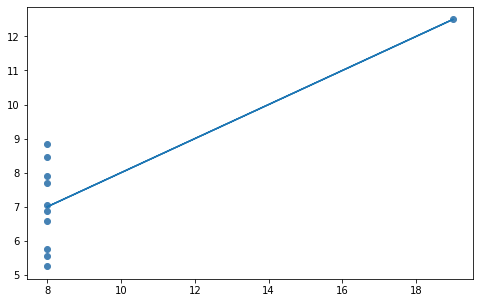

In [16]:
type4=df.loc[df['dataset']=='IV']
#fc=(df['dataset']=='I')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
ax.scatter(type4["x"], type4["y"], color="steelblue")
alpha,beta,yhat = regression(type4["x"],type4["y"])
line = ax.plot(type4["x"],yhat,label="LS fit")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     18.00
Date:                Sun, 25 Apr 2021   Prob (F-statistic):            0.00216
Time:                        20:48:49   Log-Likelihood:                -16.833
No. Observations:                  11   AIC:                             37.67
Df Residuals:                       9   BIC:                             38.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0017      1.124      2.671      0.0

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


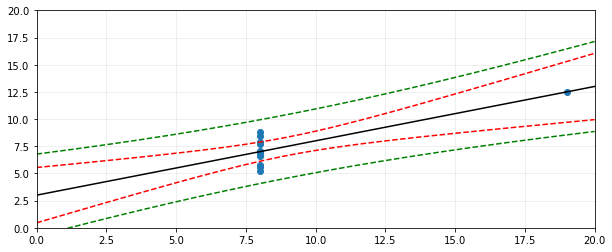

In [17]:
lm1=sm.OLS(type4["y"],sm.add_constant(type4["x"])).fit()
print(lm1.summary())
xgrd=np.linspace(0,20,1000) 
predictions = lm1.get_prediction(sm.add_constant(xgrd))

predmat=predictions.summary_frame(0.05)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
ax.set_axisbelow(True)
ax.set_xlim([0,20])
ax.set_ylim([0,20])
plt.scatter(type4["x"],type4["y"], label='data')
ax.grid(alpha=0.25)
plt.plot(xgrd,(predmat.mean_ci_lower+predmat.mean_ci_upper)/2, color='black', label='Regression')
plt.plot(xgrd,predmat.mean_ci_lower, 'r--', label='Conf Low')
plt.plot(xgrd,predmat.mean_ci_upper, 'r--', label='Conf Up')
plt.plot(xgrd,predmat.obs_ci_lower, 'g--', label='Pred Low')
plt.plot(xgrd,predmat.obs_ci_upper, 'g--', label='Pred Up')


#### Part B: Make a scatter plot where the original x-values are the x-axis and the residuals of the line of best least-squares fit are the y-axis.

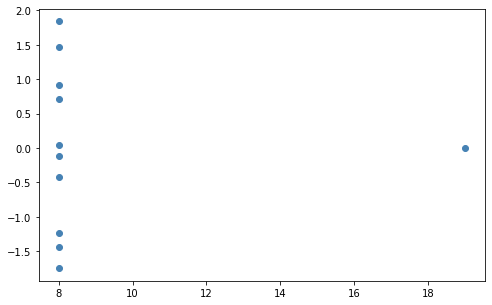

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
ax.scatter(type4["x"], type4["y"]-yhat, color="steelblue")


#### Part C: For each of the 4 major assumptions of the simple linear regression model, use your plots in parts A and B to decide whether or not the data set meets those assumptions.

it violate the homoscedasticity. there is a outliner.


#### Part D: If the data set violated any assumptions in part C, adjust the model accordingly if possible.  Consider removing outliers, adding higher order polynomial terms, etc.  If you adjust the model, make another set of plots as in parts A and B of the new fit and the new residuals.

In [19]:
new=type4.loc[df['x']<18]
print(new)

   dataset    x     y
33      IV  8.0  6.58
34      IV  8.0  5.76
35      IV  8.0  7.71
36      IV  8.0  8.84
37      IV  8.0  8.47
38      IV  8.0  7.04
39      IV  8.0  5.25
41      IV  8.0  5.56
42      IV  8.0  7.91
43      IV  8.0  6.89


<ipython-input-3-9a8099b5cefa>:6: RuntimeWarning: invalid value encountered in double_scalars
  beta = numerator/denominator


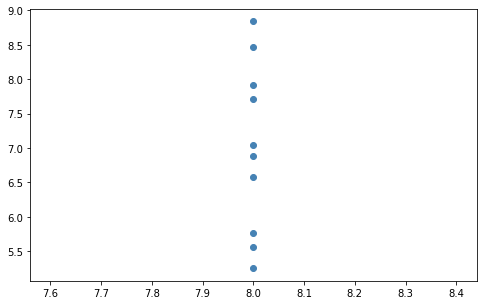

In [20]:
lm1=sm.OLS(new["y"],sm.add_constant(new["x"])).fit()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
ax.scatter(new["x"], new["y"], color="steelblue")
alpha,beta,yhat = regression(new["x"],new["y"])
line = ax.plot(new["x"],yhat,label="LS fit")


#### Part E: Write a sentence or two describing your thought process above.  If you did not adjust a model, why not?  If you did, what are the effects?

there is a outliner in the picture and other has the same x.